In [49]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import zscore
from sklearn.metrics import log_loss

In [62]:
import seaborn as sn
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import median, mean
import statsmodels

In [3]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [4]:
df = pd.read_csv(r'C:\Users\Mayank1\Downloads\uv2towea1d\OnlineNewsPopularity.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [51]:
df['weekday_is_wednesday']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39639    1.0
39640    1.0
39641    1.0
39642    1.0
39643    1.0
Name: weekday_is_wednesday, Length: 39621, dtype: float64

In [6]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

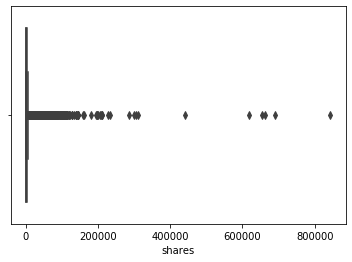

In [7]:
sn.boxplot(df['shares'])

In [8]:
df = df[~(df['shares']>150000)]
## OUTLIERS NEED TO BE REMOVED FROM  THE TARGET VARIABLE

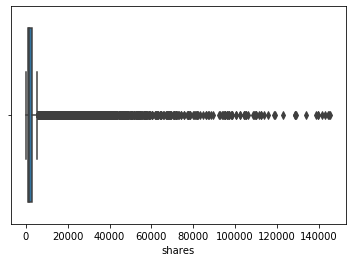

In [9]:
sn.boxplot(df['shares'])

In [10]:
df = df.iloc[:, 2:]

In [11]:
df.corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018243,-0.005307,-0.004742,-0.005405,-0.053403,-0.014854,-0.008802,0.051562,-0.071111,...,-0.024972,-0.021398,-0.017151,-0.029294,0.011502,0.077260,0.000350,-0.146935,0.040581,0.008018
n_tokens_content,0.018243,1.000000,-0.004721,0.017517,0.000387,0.423187,0.305162,0.343209,0.103815,0.167746,...,-0.261573,0.415823,-0.130495,-0.450802,0.225860,0.004273,0.022980,0.007206,0.013235,-0.007388
n_unique_tokens,-0.005307,-0.004721,1.000000,0.999572,0.999852,-0.004356,0.006611,0.018800,-0.000599,0.026374,...,0.009171,-0.009089,0.001482,0.009923,-0.007292,-0.004689,-0.002332,-0.009236,-0.004225,0.001853
n_non_stop_words,-0.004742,0.017517,0.999572,1.000000,0.999533,0.005510,0.013587,0.028484,-0.000901,0.031512,...,0.000884,0.002019,-0.001343,-0.001188,-0.000745,-0.005404,-0.001655,-0.008501,-0.004403,0.001118
n_non_stop_unique_tokens,-0.005405,0.000387,0.999852,0.999533,1.000000,-0.004990,0.007571,0.014227,-0.000965,0.034141,...,0.008352,-0.002288,-0.001935,0.004347,-0.006678,-0.005875,-0.002916,-0.008567,-0.005352,0.000838
num_hrefs,-0.053403,0.423187,-0.004356,0.005510,-0.004990,1.000000,0.396539,0.342734,0.114576,0.222441,...,-0.082131,0.286514,-0.152182,-0.263578,0.054843,0.043622,0.038956,0.009469,0.056137,0.066317
num_self_hrefs,-0.014854,0.305162,0.006611,0.013587,0.007571,0.396539,1.000000,0.238647,0.077403,0.126696,...,-0.072722,0.189737,-0.058138,-0.122000,0.039189,-0.011292,0.026272,0.009024,-0.006677,-0.003753
num_imgs,-0.008802,0.343209,0.018800,0.028484,0.014227,0.342734,0.238647,1.000000,-0.067234,0.033669,...,-0.024697,0.155145,-0.072579,-0.136570,0.042629,0.056851,0.046584,-0.013828,0.063307,0.061176
num_videos,0.051562,0.103815,-0.000599,-0.000901,-0.000965,0.114576,0.077403,-0.067234,1.000000,-0.003050,...,-0.010016,0.125543,-0.115918,-0.138235,0.027342,0.061278,0.022036,-0.022181,0.055438,0.030334
average_token_length,-0.071111,0.167746,0.026374,0.031512,0.034141,0.222441,0.126696,0.033669,-0.003050,1.000000,...,0.221979,0.470854,-0.324275,-0.278532,-0.194567,-0.040856,-0.016719,0.027005,-0.037380,-0.030130


In [12]:
df.shape

(39621, 59)

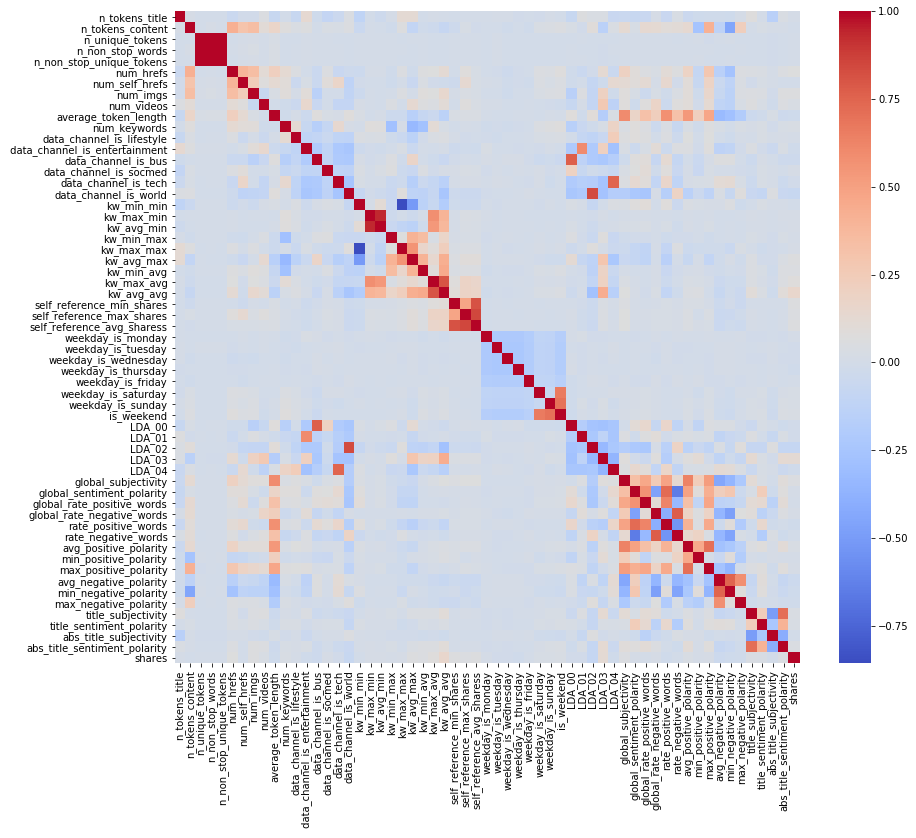

In [13]:
plt.figure(figsize=(14,12))
sn.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [14]:
## HIGH COLLINEARITY BETWEEN 3-4 VARIABLES

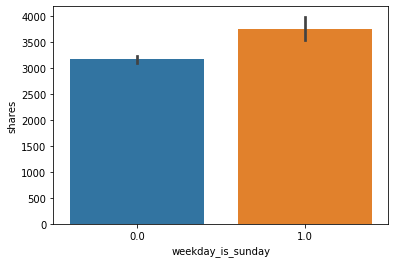

In [55]:
## ANALYSIS OF NO. OF SHARES OVER DIFFERENT DAYS OF THE WEEK
sn.barplot(df['weekday_is_sunday'],df['shares'])

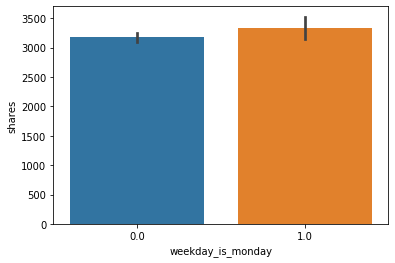

In [56]:
sn.barplot(df['weekday_is_monday'],df['shares'])

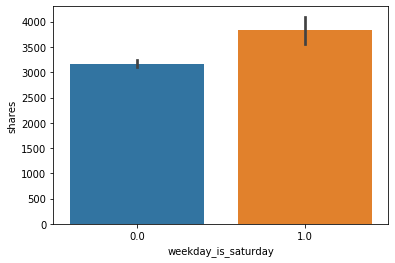

In [57]:
sn.barplot(df['weekday_is_saturday'],df['shares'])

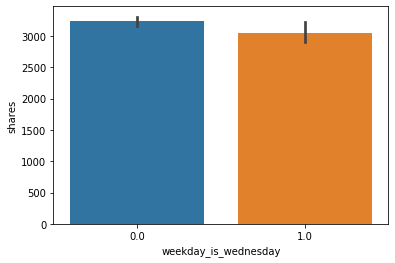

In [58]:
sn.barplot(df['weekday_is_wednesday'],df['shares'])

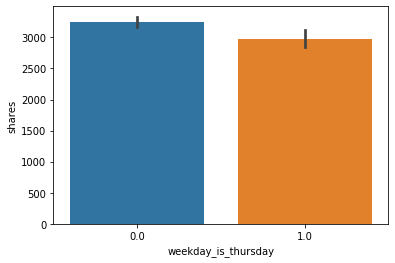

In [59]:
sn.barplot(df['weekday_is_thursday'],df['shares'])

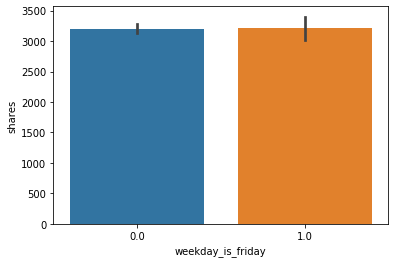

In [60]:
sn.barplot(df['weekday_is_friday'],df['shares'])

In [ ]:
## WEEKENDS SEE MORE NO. OF SHARES

In [17]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
## BASED ON HEATMAP, FURTHER CHECKING FOR CORRELATION BETWEEN INDIVIDUAL FEATURES AND LABEL

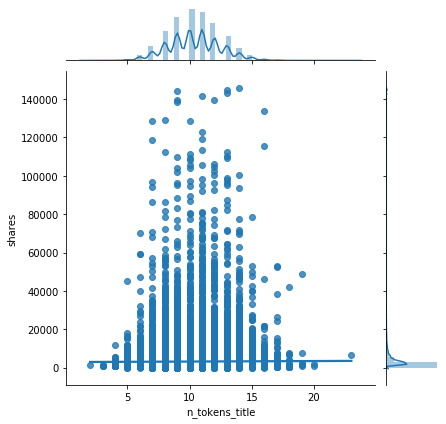

In [19]:
sn.jointplot(df['n_tokens_title'],df['shares'],kind ='reg')
plt.show()

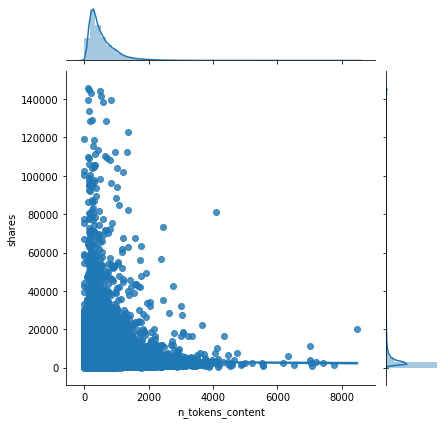

In [20]:
sn.jointplot(df['n_tokens_content'],df['shares'],kind ='reg')
plt.show()

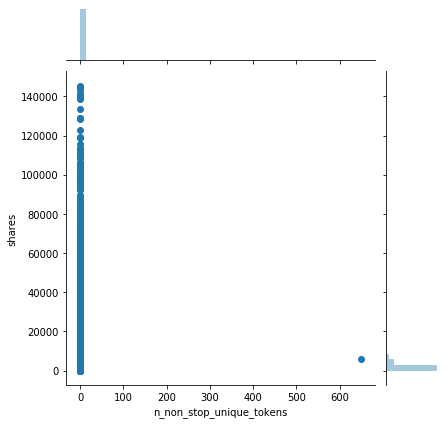

In [21]:
sn.jointplot(df['n_non_stop_unique_tokens'],df['shares'])
plt.show()

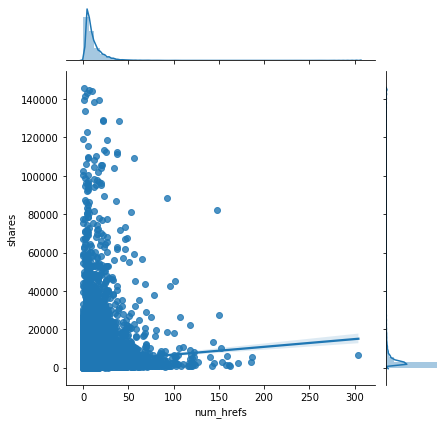

In [22]:
sn.jointplot(df['num_hrefs'],df['shares'],kind ='reg')
plt.show()

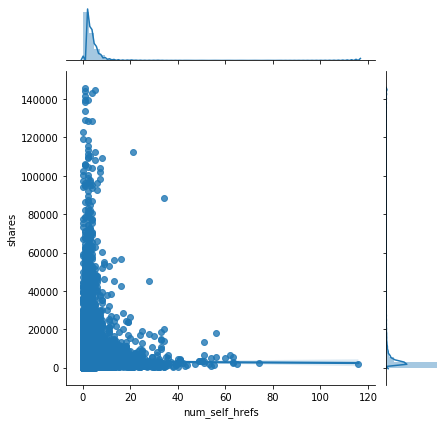

In [23]:
sn.jointplot(df['num_self_hrefs'],df['shares'],kind ='reg')
plt.show()

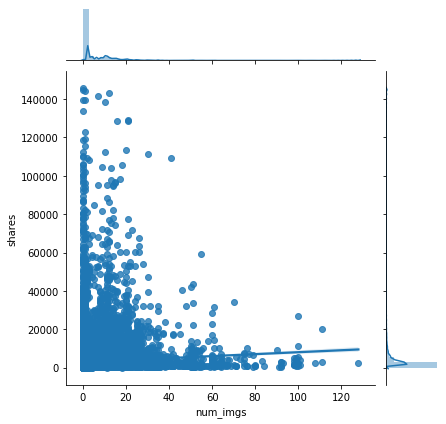

In [24]:
sn.jointplot(df['num_imgs'],df['shares'],kind ='reg')
plt.show()

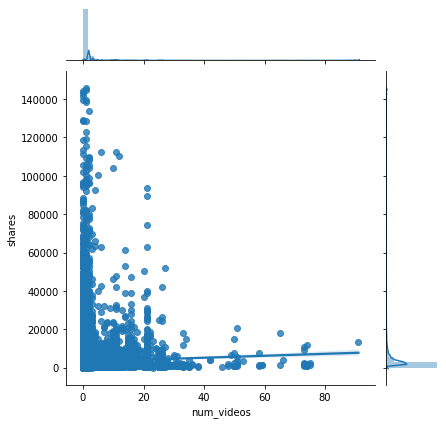

In [25]:
sn.jointplot(df['num_videos'],df['shares'],kind ='reg')
plt.show()

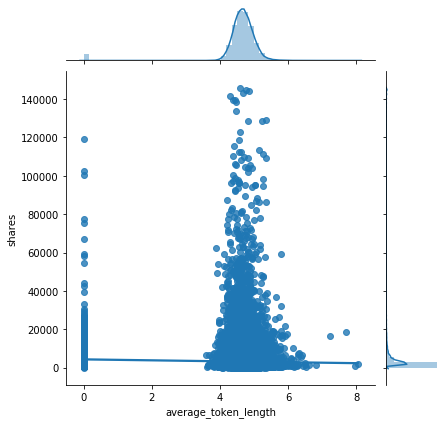

In [26]:
sn.jointplot(df['average_token_length'],df['shares'],kind ='reg')
plt.show()

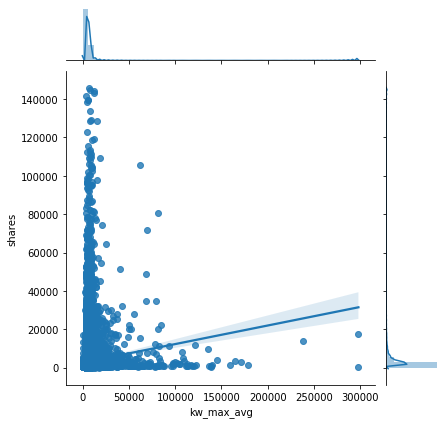

In [27]:
sn.jointplot(df['kw_max_avg'],df['shares'],kind ='reg')
plt.show()

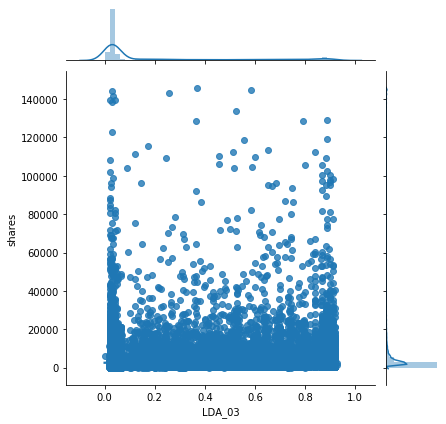

In [28]:
sn.jointplot(df['LDA_03'],df['shares'],kind ='reg')
plt.show()

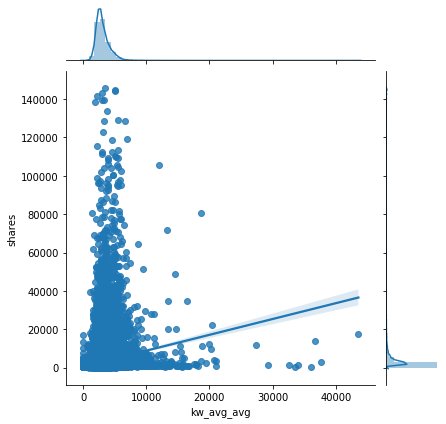

In [29]:
sn.jointplot(df['kw_avg_avg'],df['shares'],kind ='reg')
plt.show()

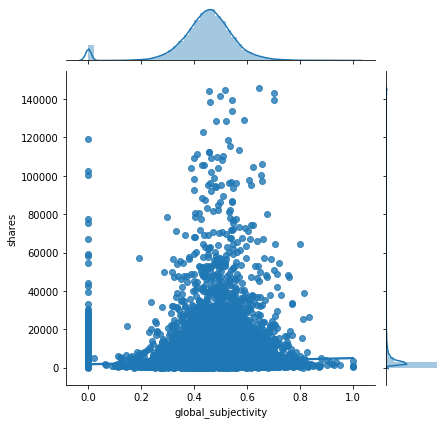

In [30]:
sn.jointplot(df['global_subjectivity'],df['shares'],kind ='reg')
plt.show()

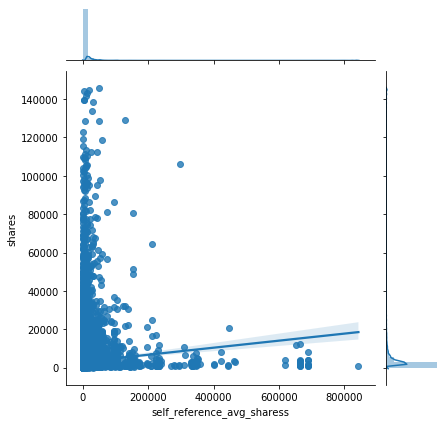

In [31]:
sn.jointplot(df['self_reference_avg_sharess'],df['shares'],kind ='reg')
plt.show()

In [32]:
## DROPPING THE COLLINEAR VARIABLES
df = df.drop(columns=['n_unique_tokens','n_non_stop_words','kw_max_min','n_non_stop_unique_tokens','average_token_length'])

In [33]:
df

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,4.0,2.0,1.0,0.0,5.0,0.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,3.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,3.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,9.0,0.0,1.0,0.0,7.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,19.0,19.0,20.0,0.0,7.0,0.0,0.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,9.0,7.0,1.0,1.0,8.0,0.0,0.0,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,9.0,7.0,3.0,48.0,7.0,0.0,0.0,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,24.0,1.0,12.0,1.0,8.0,0.0,0.0,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,10.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [34]:
X = df.iloc[:,:53]

In [35]:
Y = df['shares']

In [36]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = .25, random_state = 85)

In [37]:
## NEED TO DO FINAL FEATURE SELECTION HERE
# CONFIGURE TO SELECT ALL FEATURES
fs = SelectKBest(score_func=f_regression, k='all')
# LEARN RELATIONSHIP FROM TRAIN DATA
fs.fit(X_train, Y_train)
# TRANSFORM DATA
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)


Feature 0: 2.086337
Feature 1: 1.017145
Feature 2: 121.600865
Feature 3: 0.681435
Feature 4: 125.816393
Feature 5: 28.729204
Feature 6: 34.289541
Feature 7: 3.216155
Feature 8: 18.016608
Feature 9: 33.354318
Feature 10: 6.385097
Feature 11: 3.791864
Feature 12: 160.305593
Feature 13: 0.401001
Feature 14: 14.919551
Feature 15: 3.288243
Feature 16: 6.944090
Feature 17: 114.596955
Feature 18: 79.313316
Feature 19: 226.232859
Feature 20: 789.934406
Feature 21: 116.109606
Feature 22: 78.878979
Feature 23: 136.374400
Feature 24: 0.704759
Feature 25: 1.053129
Feature 26: 3.106522
Feature 27: 8.111512
Feature 28: 0.013508
Feature 29: 14.426656
Feature 30: 15.407025
Feature 31: 32.098982
Feature 32: 4.786503
Feature 33: 7.621627
Feature 34: 230.939756
Feature 35: 472.995733
Feature 36: 9.808026
Feature 37: 88.867989
Feature 38: 0.484309
Feature 39: 0.148976
Feature 40: 9.581350
Feature 41: 16.887895
Feature 42: 0.054860
Feature 43: 20.915947
Feature 44: 6.331049
Feature 45: 5.293833
Feature 46:

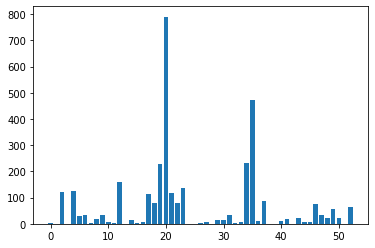

In [38]:
# SCORES FOR FEATURES
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# PLOTTING SCORES
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [39]:
## FEATURES WITH SCORE ABOVE 70 PERCENT GET SELECTED 
df2 = df.iloc[:,[2,4,12,17,19,20,21,22,23,34,35,37,46,]]


In [40]:
df2['shares'] = df['shares']
df2

C:\Users\Mayank1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,num_hrefs,num_imgs,data_channel_is_world,kw_avg_max,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_02,LDA_03,global_subjectivity,avg_negative_polarity,shares
0,4.0,1.0,0.0,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.040005,0.041263,0.521617,-0.350000,593
1,3.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.050096,0.050101,0.341246,-0.118750,711
2,3.0,1.0,0.0,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.033351,0.033334,0.702222,-0.466667,1500
3,9.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.494651,0.028905,0.429850,-0.369697,1200
4,19.0,20.0,0.0,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028575,0.028572,0.513502,-0.220192,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,9.0,1.0,0.0,374962.500000,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.151701,0.025000,0.482679,-0.260000,1800
39640,9.0,3.0,0.0,192985.714286,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.231866,0.681635,0.564374,-0.211111,1900
39641,24.0,12.0,0.0,295850.000000,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.025207,0.643794,0.510296,-0.356439,1900
39642,10.0,1.0,1.0,254600.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.839987,0.040002,0.358578,-0.205246,1100


In [41]:
X = df2.values

In [42]:
Y = df2['shares']

In [44]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = .25, random_state = 85)

In [45]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
Y_pred = lr.predict(X_test)
df2 = pd.DataFrame({'Actual':Y_test,'Pred':Y_pred})
df2

,Actual,Pred
6783,1800,1800.0
27170,2700,2700.0
22155,5600,5600.0
19185,1100,1100.0
10596,1700,1700.0
...,...,...
10682,813,813.0
38672,3900,3900.0
27452,1200,1200.0
1740,1300,1300.0


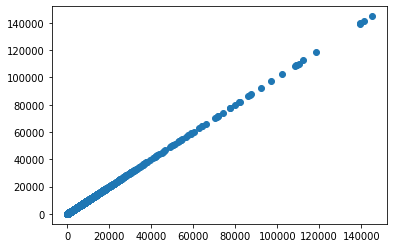

In [47]:
plt.scatter(Y_test,Y_pred)

In [48]:
print('Variance score: {}'.format(lr.score(X_test, Y_test)))

Variance score: 1.0


In [137]:
#model = RandomForestRegressor(n_estimators=50) 
#model.fit(X_train,Y_train)
#print(model.feature_importances_)

[1.44055400e-02 4.54056842e-02 4.74737881e-02 2.19505133e-05
 2.35823720e-02 2.30002291e-02 9.30896775e-03 1.48308002e-02
 1.31874956e-02 3.39295451e-02 5.70619439e-03 3.36653162e-03
 1.71231008e-03 9.72722011e-03 1.82119988e-03 3.54887422e-03
 1.47065105e-03 2.92052130e-03 1.81368593e-02 2.47399173e-02
 1.69011613e-02 7.84092926e-03 4.30844580e-02 1.12616645e-02
 3.42153259e-02 8.06150331e-02 2.13781764e-02 2.26557216e-02
 3.23731798e-02 1.81276676e-03 6.47738299e-03 1.15836428e-02
 3.32144322e-03 1.84509167e-03 3.38257703e-03 9.48995318e-04
 1.38018604e-03 3.50823801e-02 3.05586577e-02 3.71412157e-02
 2.57610780e-02 2.38847958e-02 3.64071097e-02 2.50733294e-02
 1.49936641e-02 1.75061316e-02 1.06057407e-02 6.51208399e-03
 2.84541780e-02 7.21698296e-03 6.87653832e-03 1.96312781e-02
 1.19121485e-02 1.72131118e-02 6.25016934e-03 1.80305159e-02
 1.19799847e-02 9.53451793e-03]
